# Table of Contents

1. [Loading the Dataset](#1.-Loading-the-Dataset)
2. [Data Preparation](#2.-Data-Preparation)    
      2.1 [Checking missing values](#2.1-Checking-missing-values)        
      2.2 [Encoding categorical data](#2.2-Encoding-categorical-data)      
      2.3 [Data Normalization](#2.3-Data-Normalization)
3. [Feature Engineering](#3.-Feature-Engineering)
4. [Data Modeling](#4.-Data-Modeling)   
      4.1[Logistic Regression Model](#4.1-Model-Training-with-Logistic-Regression)

5. [Performance Measurement](#5.-Performance-measurement)
6. [Visualize Matrix Confusion](#6.-Visualizing-Confusion-Matrix-using-Heatmap)
7. [Building the Artificial Neural Network](#7.-Building-the-Artificial-Neural-Network)  
      7.1 [DefineKeras Model](#7.1-Define-Kera-Model)  
      7.2 [Compiling the ANN](#7.2-Compiling-the-ANN)
8. [ANN Performance measurement](#8.-ANN-Performance-measurement)
9. [Visualizing Confusion Matrix using Heatmap](#9.-Visualizing-Confusion-Matrix-using-Heatmap)
10. [Compare performance between two algorithms](#10.-Compare0-performance-between-two-algorithms)


# 1. Loading the Dataset

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.shape

(10000, 14)

In [3]:
#To see statistical details of the dataset,
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# 2. Data Preparation


### 2.1 Checking missing values

In [4]:
# looking for the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:

# Get all the null values from data set
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Remove RowNumber, CustomerId, and Surname features
dataset = dataset.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

dataset.head()
# import libraries to labelEconder

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.2 Encoding categorical data

In [7]:
# Convert categorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


dataset['Geography'] = le.fit_transform(dataset['Geography'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])


In [8]:
dataset.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [9]:
dataset.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [10]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### 2.3 Data Normalization

In [11]:
# Data Normalization

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard",
            "IsActiveMember","EstimatedSalary"]

dataset[columns]= mms.fit_transform(dataset[columns])

dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


# 3. Feature Engineering

In [12]:
# X contains features
X = dataset.drop(["Exited"],axis=1)

# Y Target value
y = dataset["Exited"]

print(X.columns)

print(y.unique())

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
[1 0]


# 4. Data Modeling

### 4.1 Model Training with Logistic Regression

In [13]:
# Splitting Data into Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)


# 5. Performance measurement

In [15]:
from sklearn import metrics #confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score 

# Confusion Matrix, Accuracy, Precision, Recall metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
accuracy =   metrics.accuracy_score(y_test, y_pred)
precision =  metrics.precision_score(y_test, y_pred)
recall =     metrics.recall_score(y_test, y_pred)

print('Confusion Matrix')
print(cnf_matrix)
print('')

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')


Confusion Matrix
[[1549   46]
 [ 339   66]]

Accuracy: 80.75%
Precision: 58.93%
Recall: 16.30%


## We get an accuracy of 80.75%

# 6. Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

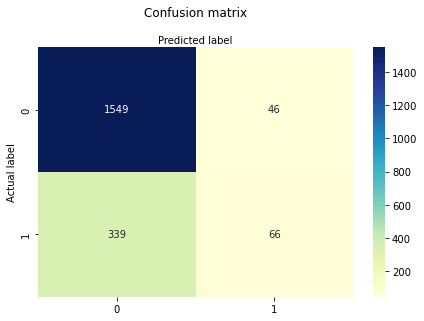

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# 7. Building the Artificial Neural Network

In [17]:
# Importing Keras libraries and packages
import keras

# For building the Neural Network layer by layer
from keras.models import Sequential
from keras.layers import Dense


### 7.1 Define Keras Model

In [18]:
# Define the keras model
model = Sequential()

# Adding first hidden layer
model.add(Dense(11, activation = 'relu', input_dim = 10))

# Adding second hidden layer
model.add(Dense(8, activation = 'relu'))

# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))



### 7.2 Compiling the ANN

In [204]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
800/800 [==============================] - 1s 650us/step - loss: 0.5106 - accuracy: 0.7868
Epoch 2/100
800/800 [==============================] - 1s 674us/step - loss: 0.4788 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 652us/step - loss: 0.4661 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 642us/step - loss: 0.4501 - accuracy: 0.7989
Epoch 5/100
800/800 [==============================] - 1s 670us/step - loss: 0.4297 - accuracy: 0.8108
Epoch 6/100
800/800 [==============================] - 1s 697us/step - loss: 0.4055 - accuracy: 0.8278
Epoch 7/100
800/800 [==============================] - 0s 619us/step - loss: 0.3878 - accuracy: 0.8345
Epoch 8/100
800/800 [==============================] - 1s 654us/step - loss: 0.3767 - accuracy: 0.8445
Epoch 9/100
800/800 [==============================] - 1s 646us/step - loss: 0.3708 - accuracy: 0.8479
Epoch 10/100
800/800 [==============================] - 1s 690us/step - l

### It will take around a minute to train. And after 100 epochs the neural network will be trained. The training accuracy is reached 86.10 % so our model is trained.


# 8. ANN Performance measurement

In [206]:
# evalute the model
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 563us/step - loss: 0.3373 - accuracy: 0.8630


[0.33725443482398987, 0.8629999756813049]

## The accuracy of the ANN model is 86.3%.

# 9. Visualizing Confusion Matrix using Heatmap


Text(0.5, 257.44, 'Predicted label')

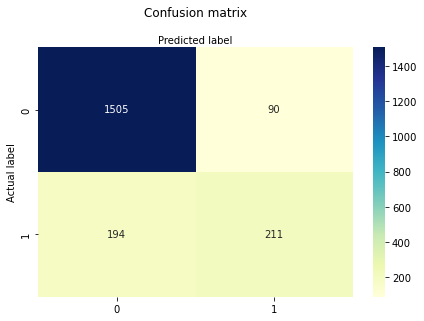

In [218]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 10. Compare performance between two algorithms

## The accurracy of the logistic regression in this model is: 80.75%
## The accuracy of the Artificial Neural Network is: 86.3%